# Método do Gradiente com Passo Fixo
Neste exemplo vamos usar o método do gradiente para minimizar

$$ f(x,y) = x^2 + 10y^2 $$

Primeiro, vamos calcular o gradiente da função como

$$ \nabla f(x,y) = (2x, 20y) $$

A seguir, vamos definir a função no código Python que será usada nos exemplos deste notebook.
A escolha da função foi feita de forma que as curvas de nível formem elipses ao longo do eixo-y para realçar os problemas com o método do gradiente clássico.

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def f(x):
    return x[0]**2 + 10*x[1]**2


def grad_f(x):
    return np.array([2*x[0], 20*x[1]])

# Visualização da função

Por se tratar de uma função de duas variávais é possível visualizar a aparência da função. O primeiro gráfico trata-se de um plot em 3D e o segundo a visualização de algumas curvas de nível

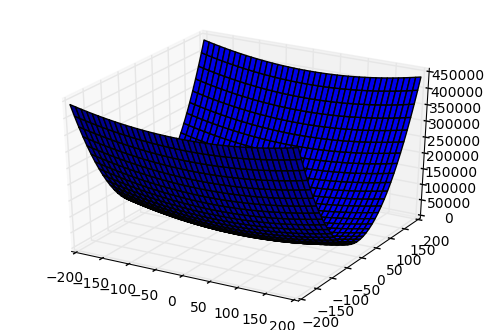

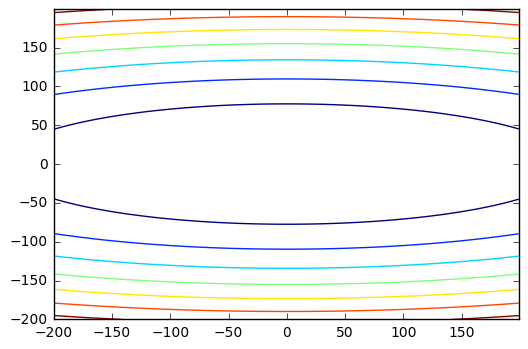

In [84]:
rmin = -200
rmax = 200

X = np.arange(rmin, rmax, 1)
Y = np.copy(X)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()
    
plt.figure()
plt.contour(X, Y, Z)
plt.show()

# Método do Gradiente com Passo Fixo

A primeira versão do método do gradiente pode ser demonstrado com a escolha de um passo fixo, no caso $l_k = 0.1$, ou seja, em cada passo do algoritmo vamos andar exatamente 10% do tamanho do vetor gradiente. Também estamos limitando o número de iterações em 20 para evitar que o algoritmo rode para sempre.

In [85]:
def grad_descent_fss(x0, grad_f, step_size=0.1, max_iter=20, tol=10e-2):
    if np.linalg.norm(grad_f(x0)) < tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > tol:
        dk = -grad_f(xk)
        x_seq.append(np.copy(xk))
        xk += step_size * dk
        iter += 1

    return np.array(x_seq)

Para demonstrar o funcionamento do método do gradiente com passo fixo, vamos tentar encontrar o mínimo da função $f$ saíndo do ponto $x_s = (100, 100)$ com um passo fixo de tamanho $l_k = 0.1$. Neste exemplo será mostrado os pontos que foram encontrados contra o gráfico de curvas de nível da função $f$.

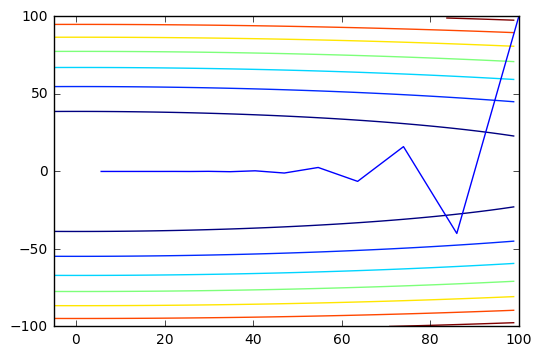

In [86]:
start_point = [100, 100]

seq_x = grad_descent_fss(start_point, grad_f=grad_f, step_size=0.07)

X = np.arange(-100, 100, 1)
Y = np.copy(X)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

#levels = sorted([f(x) for x in seq_x])

plt.figure()
plt.contour(X, Y, Z)
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.xlim([-5, 100])
plt.show()

# Método do Gradiente com *Busca Linear Exata*

Vamos resolver o mesmo problema, porém aplicando uma *busca linear exata* para determinar o tamanho do passo a ser caminhado na direção do negativo do gradiente.

Ainda considerando a função $f(x,y) = x^2 + 10y^2$, a *busca linear exata* é definida pelo subproblema de minizar a seguinte equação:

$$
\phi (t) = f[x - t \nabla f(x)] = f[ (x,y) - t(2x,20y) ] \\
\phi (t) = f(x - 2tx, y - 20ty) \\
\phi (t) = (x - 2tx)^2 + 10(y - 20ty)^2
$$

Ou seja, basta minimizar $\phi (t)$ para encontrar o tamanho do passo $t$ a ser utilizado. Para minimizar essa função, fazemos

$$
\phi'(t) = x^2 (8t - 4) + 400y^2(20t - 1) = 0
$$

E resolvemos essa equação para $t$, obtendo

$$
t = \frac{4x^2 + 400y^2}{8x^2 + 8000y^2}
$$

Assim podemos definir, utilizando linguagem de programação, a função para aplicar o método do gradiente que faz a *busca linear exata*. Note o parâmetro `eln_func` na função definida a seguir. Ela corresponde a realizar os cálculos feitos anteriormente. Por se tratar de um caso particular, a implementação da busca linear exata deve ser fornecida pela usuário da função.

In [87]:
def grad_descent_eln(x0, grad_f, eln_func, max_iter=20, tol=10e-2):
    if np.linalg.norm(grad_f(x0)) < tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > tol:
        dk = -grad_f(xk)
        
        # Exact line search
        step_size = eln_func(xk)
        
        x_seq.append(np.copy(xk))
        
        xk += step_size * dk
        
        iter += 1
    
    return np.array(x_seq)

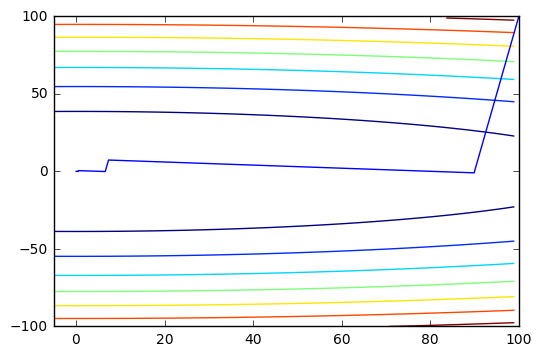

[[  1.00000000e+02   1.00000000e+02]
 [  8.99100899e+01  -8.99100899e-01]
 [  7.35628008e+00   7.35628008e+00]
 [  6.61403804e+00  -6.61403804e-02]
 [  5.41148567e-01   5.41148567e-01]
 [  4.86547163e-01  -4.86547163e-03]
 [  3.98084042e-02   3.98084042e-02]]


In [88]:
def eln_func(xk):
    x = xk[0]
    y = xk[1]
    return (4*x**2 + 400*y**2) / (8*x**2 + 8000*y**2)

seq_x = grad_descent_eln(start_point, grad_f=grad_f, eln_func=eln_func)

X = np.arange(-100, 100, 1)
X, Y = np.meshgrid(X, X)
Z = f([X, Y])

plt.figure()
plt.contour(X, Y, Z)
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.xlim([-5, 100])
# plt.ylim([-50, 50])
plt.show()

print(seq_x)

# Método do Gradiente com *Backtrack Linear Search*

Para fins de demonstração vamos utilizar um método de busca linear chamado *Backtrack Linear Search*

In [89]:
def grad_descent_btls(x0,  f, grad_f, max_iter=20, tol=10e-2, alpha=0.1, beta=0.3):
    if np.linalg.norm(grad_f(x0)) < tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > tol:
        dk = -grad_f(xk)

        # Backtrack line search
        step_size = 1.0
        while f(xk + step_size * dk) > (f(xk) + alpha * step_size * dk.dot(dk)):
            step_size *= beta

        x_seq.append(np.copy(xk))
        xk += step_size * dk

        iter += 1

    return np.array(x_seq)

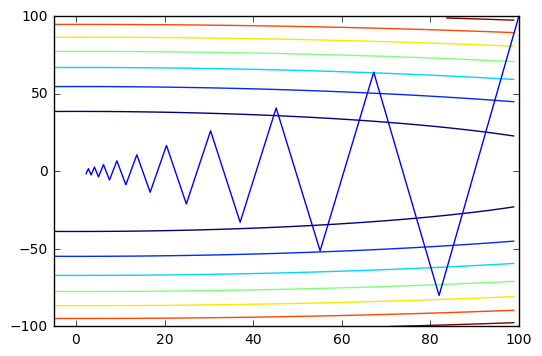

[[ 100.          100.        ]
 [  82.          -80.        ]
 [  67.24         64.        ]
 [  55.1368      -51.2       ]
 [  45.212176     40.96      ]
 [  37.07398432  -32.768     ]
 [  30.40066714   26.2144    ]
 [  24.92854706  -20.97152   ]
 [  20.44140859   16.777216  ]
 [  16.76195504  -13.4217728 ]
 [  13.74480313   10.73741824]
 [  11.27073857   -8.58993459]
 [   9.24200563    6.87194767]
 [   7.57844461   -5.49755814]
 [   6.21432458    4.39804651]
 [   5.09574616   -3.51843721]
 [   4.17851185    2.81474977]
 [   3.42637972   -2.25179981]
 [   2.80963137    1.80143985]
 [   2.30389772   -1.44115188]]


In [90]:
seq_x = grad_descent_btls(start_point, f=f, grad_f=grad_f)

X = np.arange(-100, 100, 1)
X, Y = np.meshgrid(X, X)
Z = f([X, Y])

plt.figure()
plt.contour(X, Y, Z)
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.xlim([-5, 100])
plt.show()

print(seq_x)

# Um exemplo mais complicado

Vamos demonstrar uma aplicação do método do gradiente para minimizar a seguinte função:

$$
g(x,y) = e^{x + 3y - 0.1} + e^{x - 3y - 0.1} + e^{-x-0.1}
$$

Cujo gradiente é:

$$
\nabla g(x,y) = (0.904837 e^{x - 3y} + 0.904837 e^{x + 3y} - 0.904837 e^{-x}, 2.71451(e^{6y} - 1)e^{x - 3y})
$$

Primeiramente vamos escrever escrever essa função em Python:

In [91]:
def g(x):
    x0 = x[0]
    x1 = x[1]
    t1 = np.exp(x0 + 3*x1 - 0.1)
    t2 = np.exp(x0 - 3*x1 - 0.1)
    t3 = np.exp(-x0 - 0.1)
    return t1 + t2 + t3


def grad_g(x):
    x0 = x[0]
    x1 = x[1]
    c1 = 0.904837
    c2 = 2.71451
    t1 = c1 * np.exp(x0 - 3*x1) + c1 * np.exp(x0 + 3*x1) - c1 * np.exp(-x0)
    t2 = c2 * (np.exp(6*x1) - 1.0) * np.exp(x0 - 3*x1)
    return np.array([t1, t2])

## Agora vamos visualizar essa função

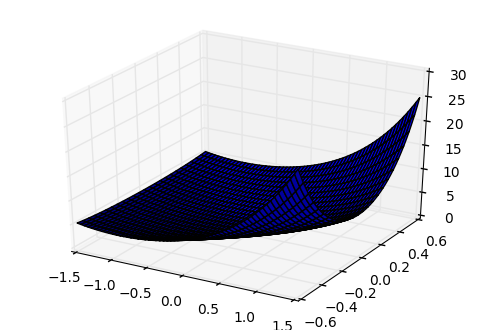

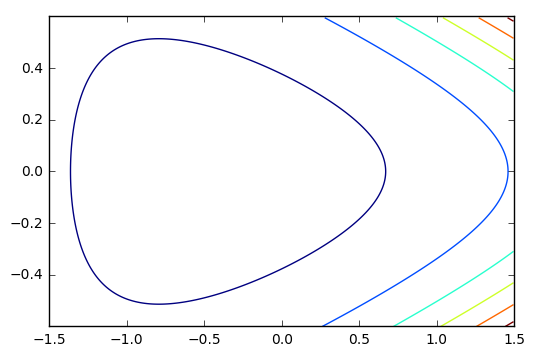

In [92]:
graph_res = 0.005

X = np.arange(-1.5, 1.5, graph_res)
Y = np.arange(-0.6, 0.6, graph_res)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

plt.figure()
plt.contour(X, Y, Z)
plt.xlim([-1.5, 1.5])
plt.ylim([-0.6, 0.6])
plt.show()

## Aplicação do Método do Gradiente

Neste exemplo vamos aplicar o método do gradiente com a busca linear partindo do ponto $x_s = (1.5, 0.4)$

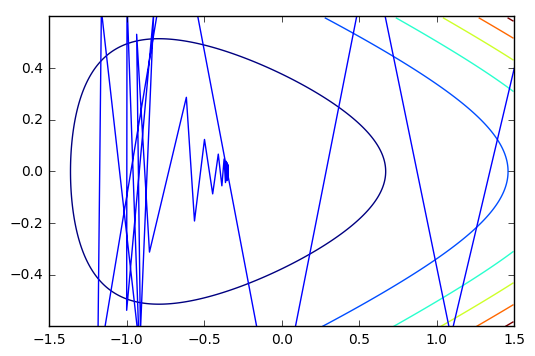

In [93]:
start_point = [1.5, 0.4]
seq_x = grad_descent_btls(start_point, f=g, grad_f=grad_g, max_iter=50, alpha=0.1, beta=0.7)

plt.figure()
plt.contour(X, Y, Z)
plt.xlim([-1.5, 1.5])
plt.ylim([-0.6, 0.6])
plt.plot(seq_x[:, 0], seq_x[:, 1])
plt.show()

## Método do Gradiente Acelerado

O método do gradiente converge muito lentamente. É possível encontrar o mínimo de uma função mais rapidamente? Para isso existe o método de Newton, mas é possível melhorar o método do gradiente.

Uma função convexa pode ser vista como um poço de potencial. Em qualquer ponto da função, sempre vai existir uma "força" tendendo ao mínimo da função. O método do gradiente como visto até agora pode, então, ser visto como uma EDO de primeira ordem:

$$
\dot{x} = -\nabla{f}(x)
$$

Que pode ser resolvida através de sucessivas aproximações lineares:

$$
x^{k+1} = x^k - \alpha \nabla f(x^k)
$$

Porém, a descida nesse poço gera oscilações. Como podemos reduzir a oscilação gerada pelo método do gradiente? Adicionamos atrito. Portanto, para evitar a oscilação adicionamos um termo de segunda ordem:

$$
\ddot{x} = -\beta \dot{x} - \nabla f(x)
$$

Esse termo de segunda ordem pode ser aproximado como se segue:

$$
x^{x+1} = x^k - \alpha \nabla f(x^k) + \beta (x^k - x^{k-1})
$$

Este é o chamado Método do Gradiente Acelerado, ou em inglês, *heavy ball method*. Podemos reescrever essa equação em duas partes, de forma a obter um método do gradiente de dois passos:

$$
p^k = -\nabla f(x^k) + \beta p^{k-1} \\
x^{k+1} = x^k + \alpha p^k
$$

No método original, o termo $p$ é o gradiente da função no ponto $x$, nesta forma, ele atua como um termo de memória que causa um amortecimento na descida para o mínimo da função. Neste método $\alpha$ e $\beta$ são constantes e $p^0 = 0$. No caso de funções quadráticas, esse método é conhecimento como **Método Iterativo de Chebyshev**.

Para demonstrar o funcionamento deste método ao comparar com o método do gradiente, vamos encontrar o mínimo da função $ f(x,y) = x^2 + 10y^2 $. No gráfico a seguir podemos ver uma comparação entre o método do gradiente e o método do gradiente acelerado. Perceba que, com o mesmo número de iterações, este converge mais rapidamente.

In [94]:
def grad_descent_acc(x0, grad_f, max_iter=20, tol=10e-2, alpha=0.1, beta=0.3):
    if np.linalg.norm(grad_f(x0)) < tol:
        return []

    x_seq = []

    iter = 0
    xk = x0
    p = np.zeros_like(x0)
    while iter < max_iter and np.linalg.norm(grad_f(xk)) > tol:
        dk = -grad_f(xk)

        x_seq.append(np.copy(xk))

        p = dk + beta * p
        xk += alpha * p

        iter += 1

    return np.array(x_seq)

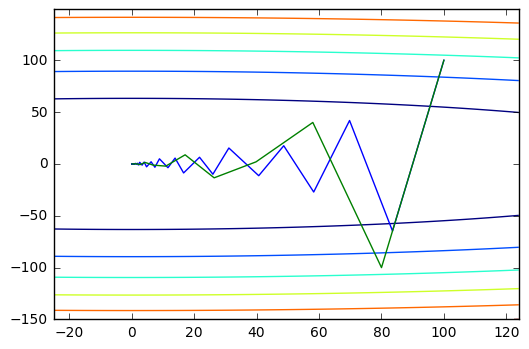

In [97]:
start_point = [100, 100]

seq_1 = grad_descent_btls(start_point, f=f, grad_f=grad_f, max_iter=50, alpha=0.1, beta=0.7)
seq_2 = grad_descent_acc(start_point, grad_f=grad_f)

graph_res = 1
X = np.arange(-25, 125, graph_res)
Y = np.arange(-150, 150, graph_res)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])

plt.figure()
plt.contour(X, Y, Z)
plt.plot(seq_1[:, 0], seq_1[:, 1])
plt.plot(seq_2[:, 0], seq_2[:, 1])
plt.show()